In [9]:
import numpy as np
import pandas as pd
from plotly.offline import plot, iplot
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
heart_data = pd.read_csv("./data/heart.csv")
heart_data
target_data = pd.read_csv("./data/target.csv")
target_data


,ID,target
0,740,0
1,403,0
2,196,1
3,671,1
4,486,1
...,...,...
374,705,1
375,563,1
376,874,0
377,719,0


In [11]:
# merge 2 datasets
merged_data = pd.merge(heart_data, target_data, on = "ID", how = "inner")
merged_data
# save data
merged_data.to_csv("./data/final_data.csv")
merged_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,ID,target
0,57,1,0,150,276,0,0,112,1,0.6,1,1,1,730,0
1,59,1,3,170,288,0,0,159,0,0.2,1,0,3,50,0
2,57,1,2,150,126,1,1,173,0,0.2,2,1,3,744,1
3,56,0,0,134,409,0,0,150,1,1.9,1,2,3,24,0
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,608,1


In [12]:
# Separate and write down continuous, ordinal and nominal variables.
# nominal variable names
nominal = pd.DataFrame(merged_data, columns = ["sex", "cp", "fbs", "exang", "ca", "thal", "restecg", "ID"])
nominal
# ordinal variable names
ordinal = pd.DataFrame(merged_data, columns = ["slope", "target"])
# categorical variable names
continous = pd.DataFrame(merged_data, columns = ["age", "trestbps", "chol", "thalach", "oldpeak"])

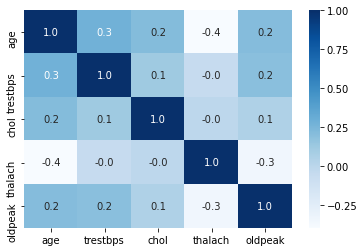

In [15]:
# Create two correlation heatmaps of continuous variables using seaborn.
# The first plot should include only the absolute values of the correlation coefficients, 
# and the plot should have only one color scale (for example shades of blue).
fig = sns.heatmap(continous.corr(), annot=True, fmt='.1f', cmap="Blues")
# plot(fig , filename = "C:\\Users\\user\\Desktop\\plots\\heatmap_blue.html")  ????
plt.savefig(fname = "./plots/heatmap_blue.jpg")

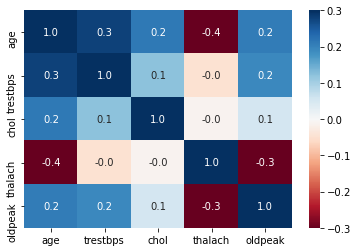

In [16]:
# Second should include also the sign of the correlation coefficient and should have 2 color scales 
# (all negative correlations should have red color, the higher the correlation the saturated the hue of the red should be;
# all positive correlations should have blue color (the higher the absolute value of the correlation coefficient, the more
# saturated should the hue of the blue be).
sns.heatmap(continous.corr(), annot=True, fmt='.1f',  vmax=.3, vmin = -.3, cmap="RdBu")
plt.savefig(fname = "./plots/heatmap_2_col.jpg")

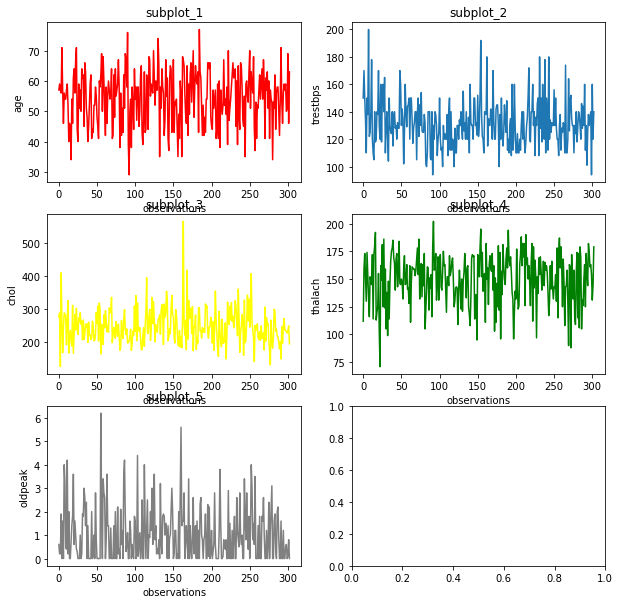

In [17]:
# Make subplots of the distribution plots for continuous variables using matplotlib.
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10)); 
# it can be done in smarter way (with some loop)
sub1 = axes[0][0]
sub2 = axes[0][1]
sub3 = axes[1][0]
sub4 = axes[1][1]
sub5 = axes[2][0]

sub1.set_title("subplot_1")
sub2.set_title("subplot_2")
sub3.set_title("subplot_3")
sub4.set_title("subplot_4")
sub5.set_title("subplot_5")

sub1.set_xlabel("observations")
sub2.set_xlabel("observations")
sub3.set_xlabel("observations")
sub4.set_xlabel("observations")
sub5.set_xlabel("observations")

sub1.set_ylabel("age")
sub2.set_ylabel("trestbps")
sub3.set_ylabel("chol")
sub4.set_ylabel("thalach")
sub5.set_ylabel("oldpeak")

sub1.plot(continous["age"],     c= "red")
sub2.plot(continous["trestbps"])
sub3.plot(continous["chol"],    c = "yellow")
sub4.plot(continous["thalach"], c = "green")
sub5.plot(continous["oldpeak"], c = "gray")
# last plot was empty, as I need only 5 plots.

Text(0, 0.5, 'age')

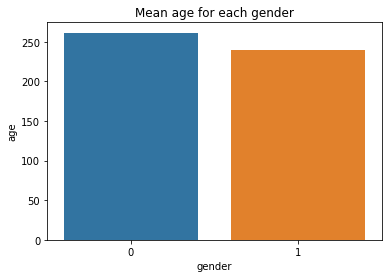

In [18]:
# Use groupby or pivot_table to get the average cholesterol level and the average age in 
# each sex group. Plot two different bar plots.
g = merged_data.groupby(['sex'])["chol"].mean()
plot_1 = sns.barplot(x = g.index , y = g.values) 
plot_1.set_title ("Mean Cholesterol for each gender")
plot_1.set_xlabel("gender")
plot_1.set_ylabel("cholesterol")

g = merged_data.groupby(['sex'])["age"].mean()
plot_2 = sns.barplot(x = g.index , y = g.values)
plot_2.set_title ("Mean age for each gender")
plot_2.set_xlabel("gender")
plot_2.set_ylabel("age")




In [19]:
# Use pd.cut() (or an alternative method) to group age variable into 0-10, 10-20, 70-80 etc
# groups. Create a new variable named “age_group” where 0 should be the value for the 
# youngest group, 1 for the second youngest, etc.
#bins = pd.IntervalIndex.from_tuples([(0, 20), (20, 40), (40, 60), (60, 80)])
c = pd.cut(merged_data["age"], bins = [0, 20, 40, 60, 80], labels = ["first", "second", "third", "forth"])
merged_data["age_group"] = c
merged_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,ID,target,age_group
0,57,1,0,150,276,0,0,112,1,0.6,1,1,1,730,0,third
1,59,1,3,170,288,0,0,159,0,0.2,1,0,3,50,0,third
2,57,1,2,150,126,1,1,173,0,0.2,2,1,3,744,1,third
3,56,0,0,134,409,0,0,150,1,1.9,1,2,3,24,0,third
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,608,1,forth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,50,1,2,140,233,0,1,163,0,0.6,1,1,3,518,0,third
299,51,1,2,94,227,0,1,154,1,0.0,2,1,3,705,1,third
300,69,1,3,160,234,1,0,131,0,0.1,1,1,2,563,1,forth
301,46,1,0,120,249,0,0,144,0,0.8,2,0,3,874,0,third


In [20]:
# For each age_group calculate the average cholesterol level and the standard deviation
# of cholesterol level in that group. Plot the result using error bar plot, where the length of
# the bar should be the average cholesterol level, and the standard deviation of the
# cholesterol level should be the error.
chol_mean = merged_data.groupby(['age_group'])["chol"].mean()
chol_mean

age_group
first            NaN
second    212.894737
third     244.004878
forth     260.151899
Name: chol, dtype: float64

In [21]:
chol_std = merged_data.groupby(['age_group'])["chol"].std()
chol_std

age_group
first           NaN
second    38.238861
third     46.116912
forth     63.415619
Name: chol, dtype: float64

<ErrorbarContainer object of 3 artists>

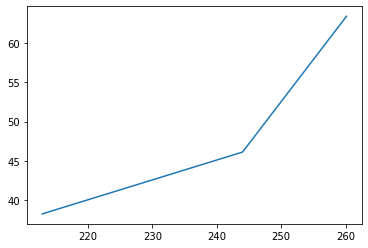

In [22]:
plt.errorbar(chol_mean, chol_std)

In [23]:
# For each age_group calculate the percentage of people with heart disease in that group.
# Plot the results as a bar plot.
heart_disease = merged_data.groupby(['age_group'])["target"].mean() * 100
heart_disease




age_group
first           NaN
second    68.421053
third     57.073171
forth     44.303797
Name: target, dtype: float64

Text(0, 0.5, 'disease in percrentages')

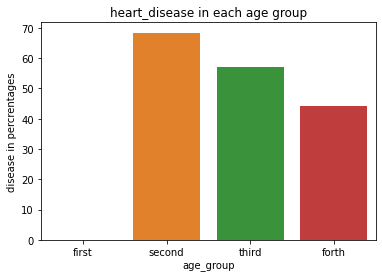

In [24]:
plot_3 = sns.barplot(x = heart_disease.index , y = heart_disease.values)
plot_3.set_title("heart_disease in each age group")
plot_3.set_ylabel("disease in percrentages")

Text(0, 0.5, 'disease in percrentages')

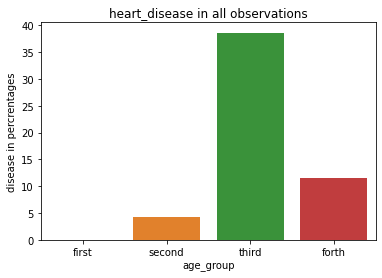

In [25]:
# each age_group calculate the percentage of people with heart disease from all
# observations. Plot the results as a bar plot.
number_of_observations = merged_data.shape[0]
heart_disease_ = (merged_data.groupby(['age_group'])["target"].sum())/number_of_observations * 100
plot_3 = sns.barplot(x = heart_disease_.index , y = heart_disease_.values)
plot_3.set_title("heart_disease in all observations")
plot_3.set_ylabel("disease in percrentages")

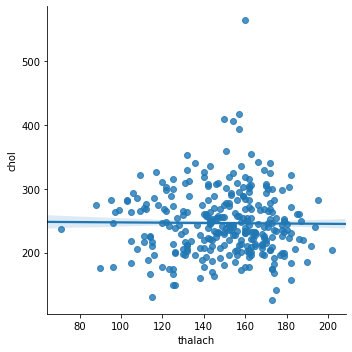

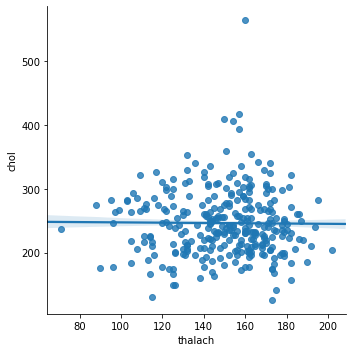

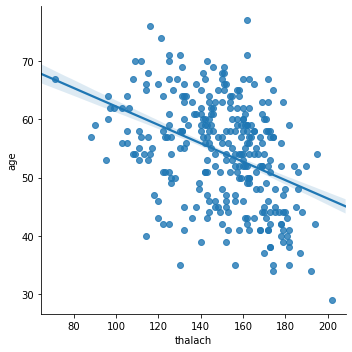

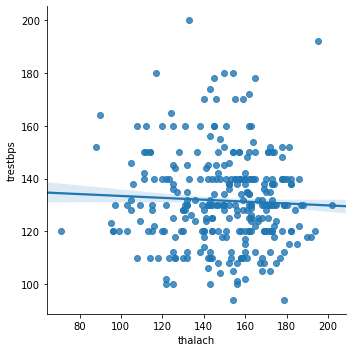

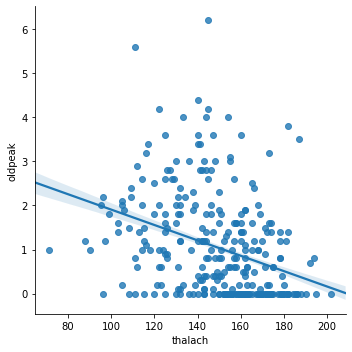

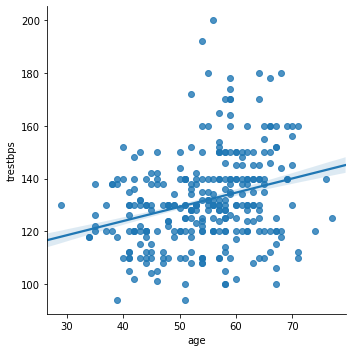

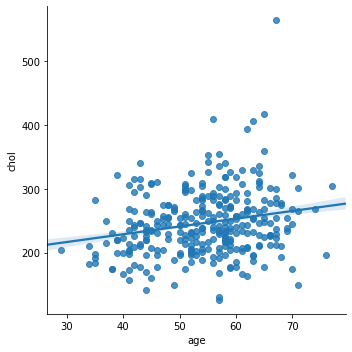

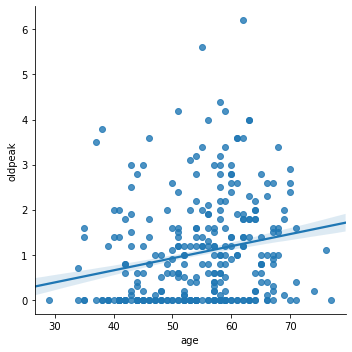

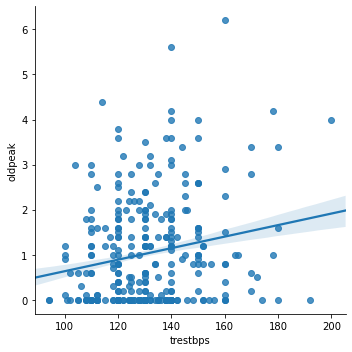

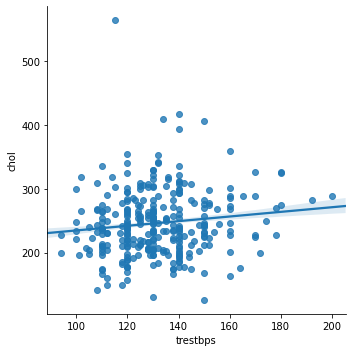

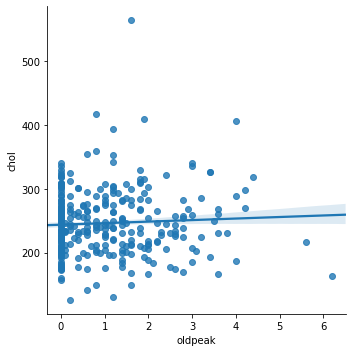

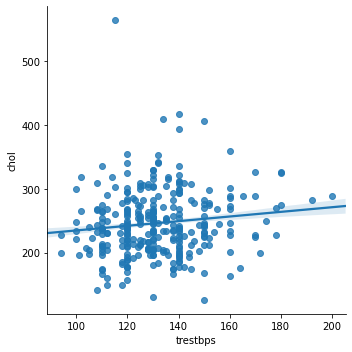

In [26]:
# Create a scatterplot for each continuous variable using seaborn and add a regression
# line with standard error included.
# continous = pd.DataFrame(merged_data, columns = ["age", "trestbps", "chol", "thalach", "oldpeak"])
sns.lmplot(x="thalach", y="chol", ci = 68, data = continous) # QUESTION!!!
                                                                               # for standard error I used ci am I right?
                                                                               # but with or without ci see no difference :( 
sns.lmplot(x="thalach", y="chol",     ci = 68, data = continous)
sns.lmplot(x="thalach", y="age",      ci = 68, data = continous)
sns.lmplot(x="thalach", y="trestbps", ci = 68, data = continous)
sns.lmplot(x="thalach", y="oldpeak",  ci = 68, data = continous)

sns.lmplot(x="age", y="trestbps",  ci = 68, data = continous)
sns.lmplot(x="age", y="chol",      ci = 68, data = continous)
sns.lmplot(x="age", y="oldpeak",   ci = 68, data = continous)

sns.lmplot(x="trestbps", y="oldpeak",  ci = 68, data = continous)
sns.lmplot(x="trestbps", y="chol",     ci = 68, data = continous)

sns.lmplot(x="oldpeak",  y="chol",  ci = 68, data = continous)
sns.lmplot(x="trestbps", y="chol",  ci = 68, data = continous)
plt.show()


# QUESTION!!! Here regplot or lmplot was the right version?






C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



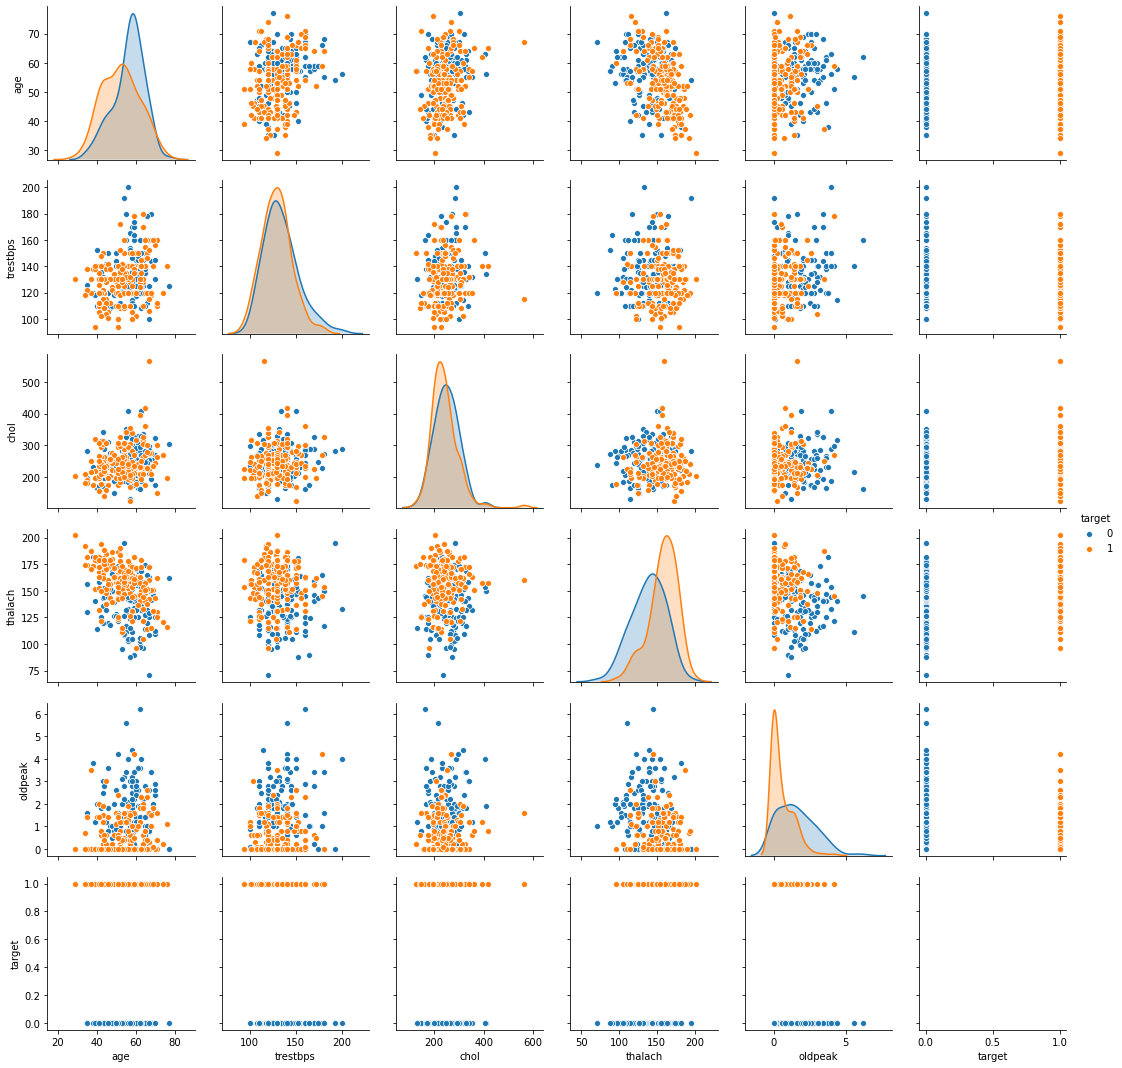

In [27]:
# Create a scatterplot for each continuous variable and group each point as belonging to
# either has heart disease or does not have heart disease.
data = pd.DataFrame(data = merged_data, columns = ["age", "trestbps", "chol", "thalach", "oldpeak", "target"])
sns.pairplot(data, hue = "target")
plt.show();